# Trabalho Prático
## **A Nutrição Humana**
### Uma Análise de Dados

*Introdução à Ciência dos Dados*

*Bernardo R. de Almeida, Lucas M. Almeida, Igor Joaquim da S. Costa*

*Departamento de Ciência da Computação – Universidade Federal de Minas Gerais (UFMG)*

*Belo Horizonte – Minas Gerais – Brasil*

**Imports para o funcionamento do notebook**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial

# Setting the random seed for reproducibility
np.random.seed(52)

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=4783801233a6017b25d399d391efc0c7c940de5461b9b0acfcd289c1a542a7c0
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


# **Introdução**

A **nutrição humana** é um tema extremamente amplo dentro das ciências. Os hábitos alimentares sempre foram um objeto de estudo de grande interesse, agregando questões físicas, políticas, acadêmicas, étnicas e culturais. A título de uma área de estudos, pode-se dizer que a nutrição estabelece uma grande tangente com diversas outras áreas e que, em função desses fatores, concentra uma gama muito valiosa e diversificada de conhecimentos e de influências nesse universo. Em particular, como um reflexo dessa amálgama, dados referentes à dieta das populações são muito ricos e abstraem muitos conhecimentos que tomam parte em diversos aspectos da vida humana, como contextos políticos, descobertas científicas, padeceres climáticos e questões como a saúde e a fisionomia.

O presente trabalho prático tem por objetivo justamente **explicitar esse grande potencial da nutrição como fonte de dados e de informações acerca de variados domínios do conhecimento**. Para tal, primeiramente, será realizada a coleta e a organização de uma grande base de dados que mapeie a evolução dos hábitos alimentares humanos ao longo de um período de tempo. Em seguida, análises particulares serão realizadas com relação a essa própria base de dados em si, assim como com outras terceiras que representem a evolução de outros aspectos, tais como a saúde ou a fisionomia. As informações coletadas serão resumidas e os potenciais insights serão explícitos, suportados por pesquisas terceiras e por técnicas da ciência dos dados e descobertos sob estudos sistemáticos que providenciem evidências de correlações, causalidades ou influências.

# **Base de dados nutricionais**

Os dados acerca da nutrição humana são provenientes de um compilado disponível no site *Our World in Data*, uma iniciativa aberta da organização sem fins lucrativos **Global Change Data Lab**, a qual agrega várias informações relativas à dieta de populações. Estas, por sua vez, são provenientes da *Food and Agriculture Organization of the United Nations*, órgão das **Nações Unidas** responsável pelo controle da alimentação e da agricultura. Em especial, duas bases de dados serão utilizadas para a construção de um compilado geral. Ambas são relativas à dieta média de diversos países ao longo de um determinado período de tempo, porém se diferem na maneira como a alimentação é abstraída e, em particular, no modo como é estratificada em termos nutricionais.

**Carregamento das bases de dados a partir de arquivos .csv**

In [ ]:
diet_composition_foodgroup = pd.read_csv("https://raw.githubusercontent.com/bereis01/Data-Science-Project-Repository/main/nutritional_data/diet_composition_foodgroup.csv")
diet_composition_macronutrient = pd.read_csv("https://raw.githubusercontent.com/bereis01/Data-Science-Project-Repository/main/nutritional_data/diet_composition_macronutrient.csv")

## Descrição inicial da base de dados "diet_composition_foodgroup"

A primeira base de dados é construída sob a participação percentual de cada categoria de alimento na alimentação média de um indíviduo. Naturalmente, ela será denominada, por simplicidade, de "Dieta por Subgrupo". Nela, é registrado o balanço de diferentes grupos de alimentos na dieta média das populações de vários países ao longo do tempo. No total, foram avaliados 173 países, cada qual com dados dentro do período de 1961 a 2013.

Em particular, há treze colunas:

* **Entity:** Nome do país

* **Code:** Sigla do país

* **Year:** Ano a que os dados se referem

* **Other (FAO (2017)) (kilocalories per person per day):** Consumo médio de "Outros"

* **Alcoholic Beverages (FAO (2017)) (kilocalories per person per day):** Consumo médio de "Bebidas Alcoólicas"

* **Sugar (FAO (2017)) (kilocalories per person per day):** Consumo médio de "Açúcar"

* **Oils & Fats (FAO (2017)) (kilocalories per person per day):** Consumo médio de "Óleos e Gorduras"

* **Meat (FAO (2017)) (kilocalories per person per day):** Consumo médio de "Carne"

* **Dairy & Eggs (FAO (2017)) (kilocalories per person per day):** Consumo médio de "Laticínios e Ovos"

* **Fruit and Vegetables (FAO (2017)) (kilocalories per person per day):** Consumo médio de "Frutas e Vegetais"

* **Starchy Roots (FAO (2017)) (kilocalories per person per day):** Consumo médio de "Raízes Amiláceas"

* **Pulses (FAO (2017)) (kilocalories per person per day):** Consumo médio de "Leguminosas"

* **Cereals and Grains (FAO (2017)) (kilocalories per person per day):** Consumo médio de "Cereais e Grãos"

Observa-se que os dados referentes aos alimentos dizem respeito à quantidade média de quilocalorias por pessoa, por dia. Além disso, como mencionado, os dados estão dentro do período de 1961 a 2013, inclusive, mas nem todos os países possuem registros em todos esses anos. Nesse ponto, já se levanta um possível questionamento acerca da razão para essa característica, o que possivelmente se associa com a metodologia de coleta de dados e com o ambiente em que tal ocorreu. Por fim, também se ressalta que há registros acerca de federações que não existem mais, ou de países depreciados, como a URSS.


In [ ]:
# Size
np.shape(diet_composition_foodgroup)

(8154, 13)

In [ ]:
# Columns
list(diet_composition_foodgroup.columns.values)

['Entity',
 'Code',
 'Year',
 'Other (FAO (2017)) (kilocalories per person per day)',
 'Alcoholic Beverages (FAO (2017)) (kilocalories per person per day)',
 'Sugar (FAO (2017)) (kilocalories per person per day)',
 'Oils & Fats (FAO (2017)) (kilocalories per person per day)',
 'Meat (FAO (2017)) (kilocalories per person per day)',
 'Dairy & Eggs (FAO (2017)) (kilocalories per person per day)',
 'Fruit and Vegetables (FAO (2017)) (kilocalories per person per day)',
 'Starchy Roots (FAO (2017)) (kilocalories per person per day)',
 'Pulses (FAO (2017)) (kilocalories per person per day)',
 'Cereals and Grains (FAO (2017)) (kilocalories per person per day)']

In [ ]:
# Number of countries evaluated
# obs.: "Cabo Verde" doesn't have attribute 'Code'
np.shape(diet_composition_foodgroup.groupby(by = 'Entity').count())

(173, 12)

In [ ]:
# First 5 rows
diet_composition_foodgroup.head()

,Entity,Code,Year,Other (FAO (2017)) (kilocalories per person per day),Alcoholic Beverages (FAO (2017)) (kilocalories per person per day),Sugar (FAO (2017)) (kilocalories per person per day),Oils & Fats (FAO (2017)) (kilocalories per person per day),Meat (FAO (2017)) (kilocalories per person per day),Dairy & Eggs (FAO (2017)) (kilocalories per person per day),Fruit and Vegetables (FAO (2017)) (kilocalories per person per day),Starchy Roots (FAO (2017)) (kilocalories per person per day),Pulses (FAO (2017)) (kilocalories per person per day),Cereals and Grains (FAO (2017)) (kilocalories per person per day)
0,Afghanistan,AFG,1961,13,0.0,51,92,88,102,82,25,16,2530
1,Afghanistan,AFG,1962,12,0.0,45,98,88,101,76,22,17,2458
2,Afghanistan,AFG,1963,13,0.0,47,106,91,110,79,23,17,2212
3,Afghanistan,AFG,1964,11,0.0,55,102,93,110,95,24,18,2445
4,Afghanistan,AFG,1965,13,0.0,57,105,95,118,95,24,18,2431


In [ ]:
# Overview
diet_composition_foodgroup.describe()

,Year,Other (FAO (2017)) (kilocalories per person per day),Alcoholic Beverages (FAO (2017)) (kilocalories per person per day),Sugar (FAO (2017)) (kilocalories per person per day),Oils & Fats (FAO (2017)) (kilocalories per person per day),Meat (FAO (2017)) (kilocalories per person per day),Dairy & Eggs (FAO (2017)) (kilocalories per person per day),Fruit and Vegetables (FAO (2017)) (kilocalories per person per day),Starchy Roots (FAO (2017)) (kilocalories per person per day),Pulses (FAO (2017)) (kilocalories per person per day),Cereals and Grains (FAO (2017)) (kilocalories per person per day)
count,8154.000000,8154.000000,8101.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000
mean,1988.014962,28.833211,73.295889,272.900049,357.627545,220.173412,170.550527,149.544395,179.074197,56.069046,1064.064753
std,15.384679,25.593864,71.148025,152.690877,189.965492,157.937054,138.159514,97.050870,211.449560,51.150346,356.279239
min,1961.000000,-1.000000,0.000000,0.000000,13.000000,16.000000,0.000000,4.000000,0.000000,0.000000,127.000000
25%,1975.000000,12.000000,17.000000,139.000000,217.000000,89.000000,49.000000,81.000000,50.000000,19.000000,800.000000
50%,1989.000000,21.000000,52.000000,285.000000,329.000000,174.000000,140.000000,132.000000,109.000000,43.000000,1039.000000
75%,2001.000000,36.000000,113.000000,389.000000,468.000000,328.000000,266.000000,196.000000,204.000000,76.000000,1304.000000
max,2013.000000,190.000000,474.000000,707.000000,1053.000000,793.000000,696.000000,772.000000,1421.000000,471.000000,2530.000000


## Limpeza e organização de "diet_composition_foodgroup"

Uma nova base de dados, vulgo "diet_foodgroup", será formada a partir dos dados brutos. Ela não conterá valores faltantes e suas colunas serão formatadas tendo-se em vista a clareza das informações. Aqui, define-se que valores faltantes dizem respeito a entradas da tabela de dados que não contêm informações, seja pela presença de valores NULL ou NaN.

A nova base de dados também descreve o balanço de diferentes grupos de alimentos na dieta média das populações de vários países ao longo do tempo, mantendo, portanto, a mesma meta-descrição do caso bruto, porém agora sem lacunas e simplificada. Em detalhes, a coluna "Code" foi removida, tendo em vista que não agrega nenhuma informação particularmente útil para a presente análise, e as demais foram renomeadas para facilitar a leitura e a interpretação. Além disso, os únicos dados faltantes - da maneira como definidos previamente - diriam respeito à coluna "Alcoholic Beverages" relativa às entradas do país Emirados Árabes Unidos. O tratamento escolhido foi a remoção de todas as entradas referentes a essa nação, de modo que a base de dados passe a englobar apenas 172 países. A razão para tal escolha deve-se à incapacidade de se derivar um valor que satisfatoriamente substituísse os faltantes, justamente pela falta completa de informações, e pela ideia de se manter a base de dados como um todo razoavelmente normalizada, no sentido de manter sempre a existência de dados relativos à todas as categorias de alimentos para efeito de comparação entre os países, sendo o caso removido uma única exceção.

Em particular, agora, há doze colunas no total:

* **Country:** Nome do país

* **Year:** Ano a que os dados se referem

* **Other:** Consumo médio de "Outros"

* **Alcoholic Beverages:** Consumo médio de "Bebidas Alcoólicas"

* **Sugar:** Consumo médio de "Açúcar"

* **Oils & Fats:** Consumo médio de "Óleos e Gorduras"

* **Meat:** Consumo médio de "Carne"

* **Dairy & Eggs:** Consumo médio de "Laticínios e Ovos"

* **Fruit & Vegetables:** Consumo médio de "Frutas e Vegetais"

* **Starchy Roots:** Consumo médio de "Raízes Amiláceas"

* **Pulses:** Consumo médio de "Leguminosas"

* **Cereals and Grains:** Consumo médio de "Cereais e Grãos"

*Os dados referentes aos alimentos dizem respeito à quantidade média de kilocalorias por pessoa, por dia.

**Nem todos os países irão possuir dados de 1961 a 2013, inclusive.

***Há registros acerca de federações que não existem mais, ou de países depreciados, como a URSS.

In [ ]:
# Removing 'Code' column. It is not as relevant for the present analysis
diet_foodgroup = diet_composition_foodgroup.drop('Code', axis = 1)

In [ ]:
# Renaming each column as a matter of visual clarity of the information
diet_foodgroup = diet_foodgroup.rename(columns = {'Entity': 'Country',
                                                  "Other (FAO (2017)) (kilocalories per person per day)": 'Other',
                                                  "Alcoholic Beverages (FAO (2017)) (kilocalories per person per day)": "Alcoholic Beverages",
                                                  "Sugar (FAO (2017)) (kilocalories per person per day)": 'Sugar',
                                                  "Oils & Fats (FAO (2017)) (kilocalories per person per day)": "Oils & Fats",
                                                  "Meat (FAO (2017)) (kilocalories per person per day)": 'Meat',
                                                  "Dairy & Eggs (FAO (2017)) (kilocalories per person per day)": "Dairy & Eggs",
                                                  "Fruit and Vegetables (FAO (2017)) (kilocalories per person per day)": "Fruits & Vegetables",
                                                  "Starchy Roots (FAO (2017)) (kilocalories per person per day)": "Starchy Roots",
                                                  "Pulses (FAO (2017)) (kilocalories per person per day)": 'Pulses',
                                                  "Cereals and Grains (FAO (2017)) (kilocalories per person per day)": "Cereals & Grains"})

In [ ]:
# Dealing with missing data
# Countries with missing data were removed. In particular, there was no information for "Alcohol Consumption" in regard to the "United Arab States"
diet_foodgroup[diet_foodgroup["Alcoholic Beverages"].isnull()]
diet_foodgroup = diet_foodgroup.dropna()

## Descrição inicial da base de dados "diet_composition_macronutrient"

A segunda base de dados estratifica a dieta pela participação percentual de macronutrientes. Seguindo a mesma lógica do caso anterior, por simplicidade, será denominada "Dieta por Macronutriente". Nela, é registrado o balanço de diferentes macronutrientes na alimentação média das populações de vários países ao longo do tempo. No total, foram avaliados 179 países, cada qual com dados dentro do período de 1961 a 2013.

Em particular, há sete colunas:

* **Entity:** Nome do país

* **Code:** Sigla do país

* **Year:** Ano a que os dados se referem

* **Calories from animal protein (FAO (2017)):** Consumo médio de calorias derivadas de "Proteína Animal"

* **Calories from plant protein (FAO (2017)):** Consumo médio de calorias derivadas de "Proteína Vegetal"

* **Calories from fat (FAO (2017)):** Consumo médio de calorias derivadas de "Gorduras"

* **Calories from carbohydrates (FAO (2017)):** Consumo médio de calorias derivadas de "Carboidratos"

Novamente, as mesmas observações realizadas para a base de dados anterior também são válidas para esta, ressaltando-se que os dados referentes aos macronutrientes dizem respeito à quantidade média de kilocalorias por pessoa, por dia.

In [ ]:
# Size
np.shape(diet_composition_macronutrient)

(8981, 7)

In [ ]:
# Columns
list(diet_composition_macronutrient.columns.values)

['Entity',
 'Code',
 'Year',
 'Calories from animal protein (FAO (2017))',
 'Calories from plant protein (FAO (2017))',
 'Calories from fat (FAO (2017))',
 'Calories from carbohydrates (FAO (2017))']

In [ ]:
# Number of countries evaluated
# obs.: "Cabo Verde" and "Sudan (former)" doesn't have attribute 'Code'
np.shape(diet_composition_macronutrient.groupby(by = 'Entity').count())

(179, 6)

In [ ]:
# First 5 rows
diet_composition_macronutrient.head()

,Entity,Code,Year,Calories from animal protein (FAO (2017)),Calories from plant protein (FAO (2017)),Calories from fat (FAO (2017)),Calories from carbohydrates (FAO (2017))
0,Afghanistan,AFG,1961,54.12,285.52,337.59,2321.77
1,Afghanistan,AFG,1962,53.92,278.00,338.49,2246.59
2,Afghanistan,AFG,1963,56.80,251.68,347.13,2042.39
3,Afghanistan,AFG,1964,57.32,276.64,350.55,2268.49
4,Afghanistan,AFG,1965,59.76,275.68,357.57,2262.99


In [ ]:
# Overview
diet_composition_macronutrient.describe()

,Year,Calories from animal protein (FAO (2017)),Calories from plant protein (FAO (2017)),Calories from fat (FAO (2017)),Calories from carbohydrates (FAO (2017))
count,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000
mean,1987.232157,126.236535,165.881670,658.244066,1663.169072
std,15.325972,79.768442,40.036567,313.874265,261.354204
min,1961.000000,10.240000,71.320000,102.420000,876.050000
25%,1974.000000,57.320000,137.800000,402.570000,1494.200000
50%,1987.000000,107.720000,159.520000,597.240000,1648.170000
75%,2001.000000,192.440000,191.680000,866.250000,1824.420000
max,2013.000000,422.720000,330.760000,1542.240000,2564.870000


## Limpeza e organização de "diet_composition_macronutrient"

Uma nova base de dados, vulgo "diet_macronutrient", será formada a partir dos dados brutos. Ela não conterá valores faltantes e suas colunas serão formatadas tendo-se em vista a clareza das informações.
Analogamente ao caso anterior, a nova base de dados também descreve o balanço de diferentes macronutrientes de alimentos na dieta média das populações de vários países ao longo do tempo, preservando a meta-descrição dos dados brutos, porém corrigindo entradas faltantes e formatando os dados efetivamente utilizados. Em particular, neste caso, não haviam entradas com dados faltantes. As modificações realizadas, portanto, se restringem à remoção da coluna "Code" e à renomeação das demais - seguindo a mesma lógica do caso anterior.

Em particular, agora, inda há 179 países, mas apenas seis colunas no total:

* **Country:** Nome do país

* **Year:** Ano a que os dados se referem

* **Animal Protein:** Consumo médio de calorias derivadas de "Proteína Animal"

* **Plant Protein:** Consumo médio de calorias derivadas de "Proteína Vegetal"

* **Fat:** Consumo médio de calorias derivadas de "Gorduras"

* **Carbohydrates:** Consumo médio de calorias derivadas de "Carboidratos"

*Os dados referentes aos macronutrientes dizem respeito à quantidade média de kilocalorias por pessoa, por dia.

**Nem todos os países irão possuir dados de 1961 a 2013, inclusive.

***Há registros acerca de federações que não existem mais, ou de países depreciados, como a URSS ou o Sudan (former).

In [ ]:
# Removing 'Code' column. It is not as relevant for the present analysis
diet_macronutrient = diet_composition_macronutrient.drop('Code', axis = 1)

In [ ]:
# Renaming each column as a matter of visual clarity of the information
diet_macronutrient = diet_macronutrient.rename(columns = {'Entity': 'Country',
                                                  "Calories from animal protein (FAO (2017))": "Animal Protein",
                                                  "Calories from plant protein (FAO (2017))": "Plant Protein",
                                                  "Calories from fat (FAO (2017))": 'Fat',
                                                  "Calories from carbohydrates (FAO (2017))": 'Carbohydrates'})

In [ ]:
# Dealing with missing data
# There was no missing data
diet_macronutrient.isnull()

,Country,Year,Animal Protein,Plant Protein,Fat,Carbohydrates
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
8976,False,False,False,False,False,False
8977,False,False,False,False,False,False
8978,False,False,False,False,False,False
8979,False,False,False,False,False,False


## Um perfil nutricional exemplar

O compilado elaborado a partir das duas bases de dados definidas permite se ter uma noção da evolução dos hábitos alimentares da população de um determinado país no período de tempo retratado. Em particular, **dado uma nação específica, é possível verificar a participação percentual dos grupos de alimentos ou dos macronutrientes em sua dieta média ao longo dos anos entre 1961 e 2013**. A seguir, pois, será plotado o perfil nutricional do Brasil. Este país contém todos os dados de 1961 a 2013 para todas as categorias de informações. Ambas as bases de dados serão utilizadas, de modo que, no total, hajam dois gráficos, os quais descrevem a evolução dos hábitos alimentares da respectiva população por grupo de alimento e por macronutriente.

A partir da visualização dos dados, é possível extrair uma série de informações. A título de exemplo, é nítida a crescente participação da gordura (macronutriente) na alimentação do brasileiro, a qual é paralela ao crescimento acentuado do consumo de óleos & gorduras (grupo de alimento), relação esta que claramente é mútua e que pode estar associada a uma série de razões, desde culturais a socioeconômicas ou científicas, assim como causar uma série de desdobramentos, como impactos na incidência de doenças cardiovasculares. Da mesma maneira, o consumo de açúcar, grande *commodity* brasileiro, teve uma queda acentuada na virada so século, o que, novamente, pode ter uma série de causas e uma série de repercursões políticas ou econômicas. Como um último exemplo, verifica-se, também na passagem do ano 2000, uma troca do consumo de proteína animal por proteína vegetal, o que pode ter relações com o balanço no consumo de alimentos e, mais uma vez, apresentar razões e consequências nos mais diversos campos do conhecimento. Estes são apenas alguns exemplos de informações visíveis a partir dos dados e de perguntas que podem ser feitas, os quais servem como uma prévia e como um incentivo para a discussão em cima de dados envolvendo a nutrição humana. A seguir, no restante do trabalho, instâncias particulares e perguntas específicas serão discutidas e trabalhadas mais a fundo, enaltecendo a riqueza da informação em voga.

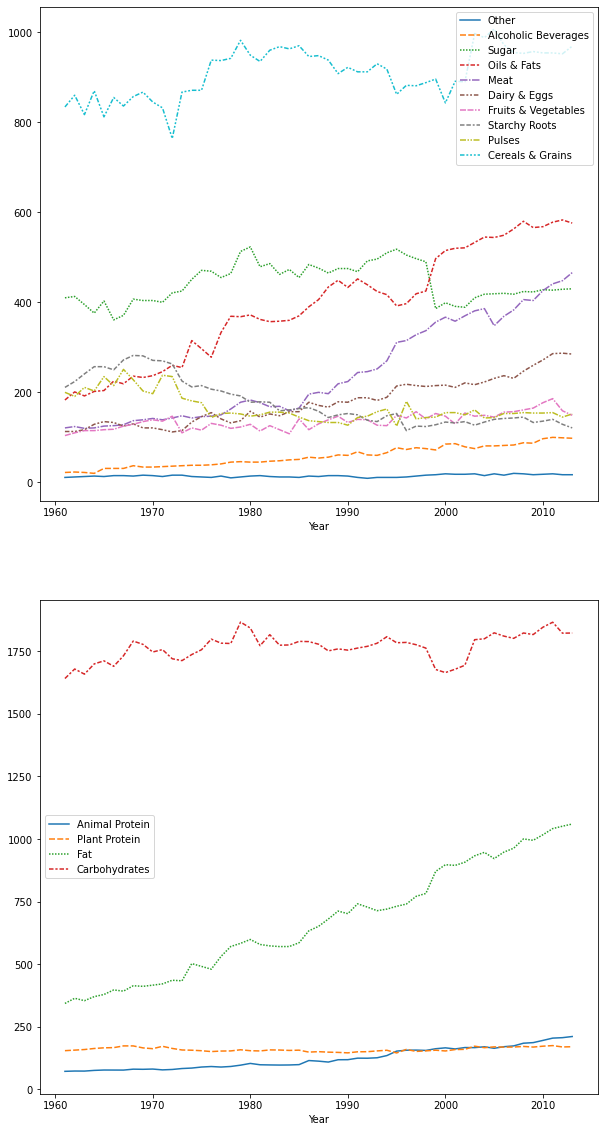

In [ ]:
# Organizing Brazil's data
brazil_diet_foodgroup = diet_foodgroup[diet_foodgroup['Country'] == 'Brazil'].drop(columns = 'Country')
brazil_diet_foodgroup.set_index(keys = 'Year', inplace = True)

brazil_diet_macronutrient = diet_macronutrient[diet_macronutrient['Country'] == 'Brazil'].drop(columns = 'Country')
brazil_diet_macronutrient.set_index(keys = 'Year', inplace = True)

# Creating the plot
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 20)

sns.lineplot(data = brazil_diet_foodgroup, ax = axs[0])
sns.lineplot(data = brazil_diet_macronutrient, ax = axs[1])

# **Análise dos dados**

## Análise em variáveis categóricas
Como dito anteriormente, dados nutricionais carregam consigo informações relevantes acerca das mais diversas áreas do conhecimento. Nesse sentido, além de ser possível estudar como grupos de alimentos se comportam e se correlacionam em um dado país, é possível usar os mesmos dados nutricionais para entender o quão discrepantes são diferentes países, com base nos seus hábitos alimentares.

Ao tomar um país ou seu continente como uma variável categórica, portas de estudos são abertas e questões interessantes são levantadas. Por exemplo, é esperado que países geograficamente próximos possuam hábitos alimentares parecidos, entretanto, é sabido que fatores sociólogicos como guerras, doenças, diferenças entre sistemas econômicos e fatores históricos possuem impacto direto na alimentação de um povo. Nesse sentido, ao analisar categoricamente os dados nutricionais de um grupo de países, é possível destrinchar como tais fatores sociólicos tiveram, ou não, impacto nas nações estudadas.

### Análise em varíaveis categóricas: América
A seguir, os dados do continente Americano serão categorizados, em função da separação dos grupos América do Norte, América Central e América do Sul. Após, perguntas específicas serão discutidas e trabalhadas mais a fundo, enaltecendo a riqueza da informação em voga.

#### América do Sul


In [ ]:
south_america_countries = [
    "Argentina",
    "Bolivia",
    "Brazil",
    "Chile",
    "Colombia",
    "Ecuador",
    "Guyana",
    # "French Guiana",
    "Paraguay",
    "Peru",
    "Suriname",
    "Uruguay",
    "Venezuela"
]
south_america_express = '|'.join(south_america_countries)

south_america = diet_macronutrient.loc[diet_macronutrient['Country'].str.contains(south_america_express,  case=False, regex=True)]
south_america["Country"].drop_duplicates()

265     Argentina
954       Bolivia
1082       Brazil
1612        Chile
1718     Colombia
2323      Ecuador
3383       Guyana
6310     Paraguay
6363         Peru
7541     Suriname
8526      Uruguay
8685    Venezuela
Name: Country, dtype: object

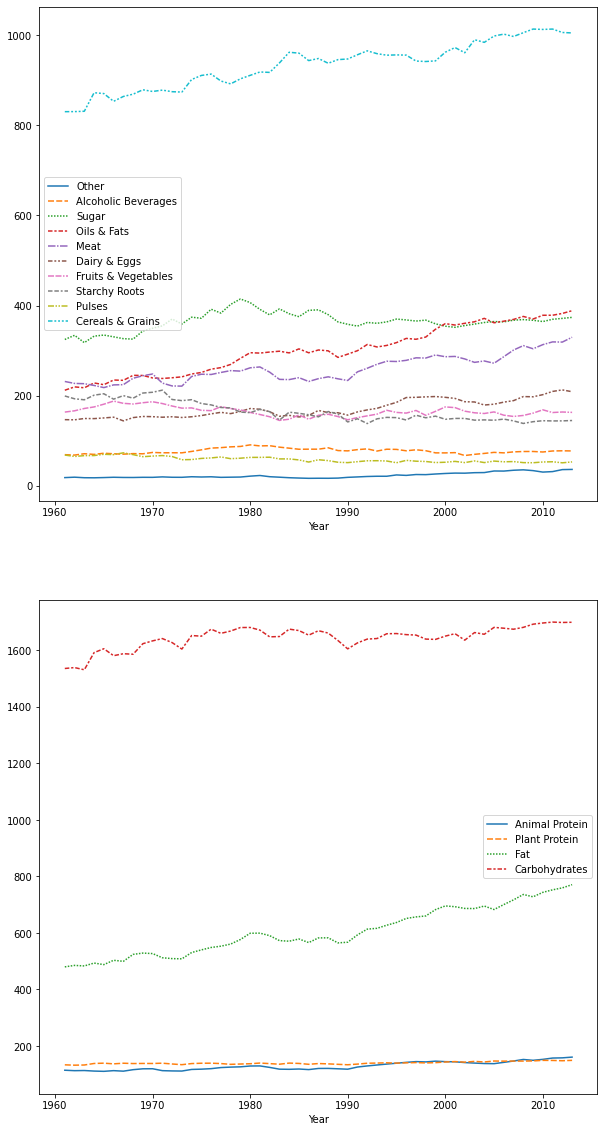

In [ ]:
# Organizing South America's data
south_america_foodgroup = diet_foodgroup.loc[diet_foodgroup['Country'].isin(south_america_countries) == True]
south_america_foodgroup_by_year = south_america_foodgroup.groupby("Year").mean()
south_america_foodgroup.set_index(keys = 'Year', inplace = True)

south_america_macronutrient = diet_macronutrient.loc[diet_macronutrient['Country'].isin(south_america_countries)]
south_america_macronutrient_by_year = south_america_macronutrient.groupby("Year").mean()
south_america_macronutrient.set_index(keys = 'Year', inplace = True)

# Creating the plot
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 20)

sns.lineplot(data = south_america_foodgroup_by_year, ax = axs[0])
sns.lineplot(data = south_america_macronutrient_by_year, ax = axs[1])

#### América Central


In [ ]:
central_america_countries = [
    "Belize"
    "Costa Rica",
    "Cuba",
    "El Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Nicaragua",
    "Panama",
]
central_america_express = '|'.join(central_america_countries)

central_america = diet_macronutrient.loc[diet_macronutrient['Country'].str.contains(central_america_express,  case=False, regex=True)]
central_america["Country"].drop_duplicates()

1952           Cuba
2429    El Salvador
3224      Guatemala
3436          Haiti
3489       Honduras
5893      Nicaragua
6257         Panama
Name: Country, dtype: object

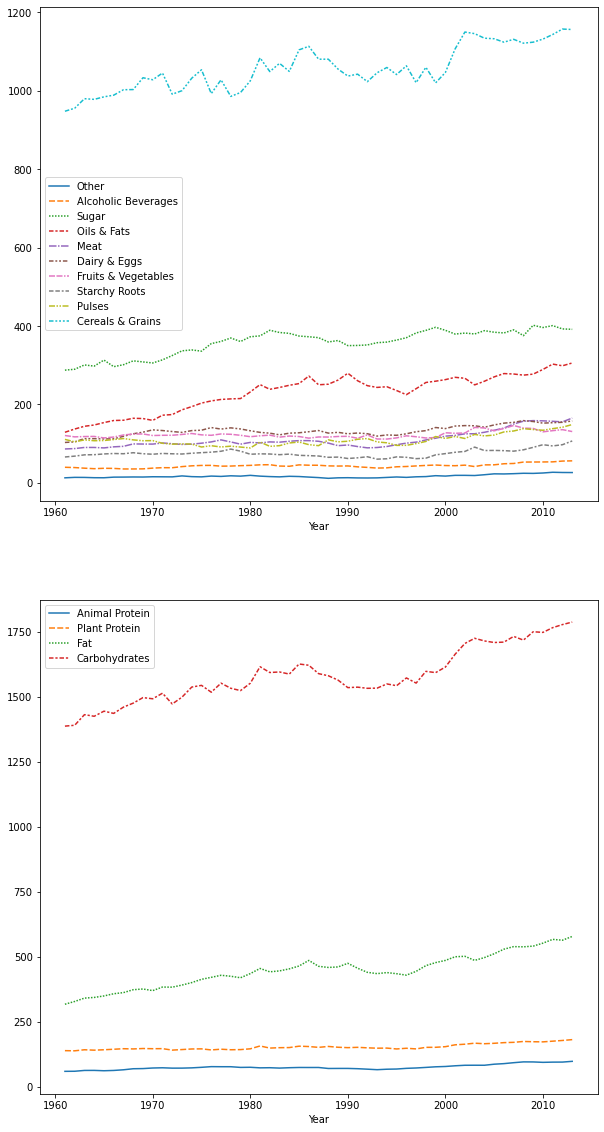

In [ ]:
# Organizing Central America's data
central_america_foodgroup = diet_foodgroup.loc[diet_foodgroup['Country'].isin(central_america_countries) == True]
central_america_foodgroup_by_year = central_america_foodgroup.groupby("Year").mean()
central_america_foodgroup.set_index(keys = 'Year', inplace = True)

central_america_macronutrient = diet_macronutrient.loc[diet_macronutrient['Country'].isin(central_america_countries)]
central_america_macronutrient_by_year = central_america_macronutrient.groupby("Year").mean()
central_america_macronutrient.set_index(keys = 'Year', inplace = True)

# Creating the plot
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 20)

sns.lineplot(data = central_america_foodgroup_by_year, ax = axs[0])
sns.lineplot(data = central_america_macronutrient_by_year, ax = axs[1])

#### América do Norte


In [ ]:
north_america_countries = [
    "Bermuda",
    "Canada",
    "Dominican Republic",
    "Mexico",
    "United States",

]
north_america_express = '|'.join(north_america_countries)

north_america = diet_macronutrient.loc[diet_macronutrient['Country'].str.contains(north_america_express,  case=False, regex=True)]
north_america["Country"].drop_duplicates()

901                Bermuda
1453                Canada
2270    Dominican Republic
5252                Mexico
8473         United States
Name: Country, dtype: object

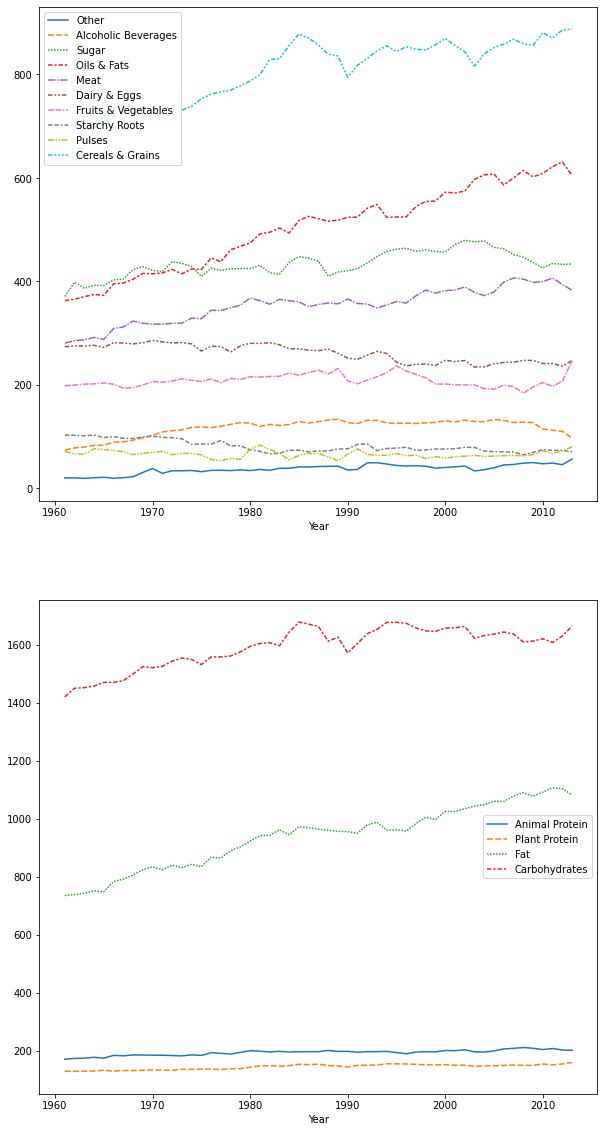

In [ ]:
# Organizing North America's data
north_america_foodgroup = diet_foodgroup.loc[diet_foodgroup['Country'].isin(north_america_countries) == True]
north_america_foodgroup_by_year = north_america_foodgroup.groupby("Year").mean()
north_america_foodgroup.set_index(keys = 'Year', inplace = True)

north_america_macronutrient = diet_macronutrient.loc[diet_macronutrient['Country'].isin(north_america_countries)]
north_america_macronutrient_by_year = north_america_macronutrient.groupby("Year").mean()
north_america_macronutrient.set_index(keys = 'Year', inplace = True)

# Creating the plot
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 20)

sns.lineplot(data = north_america_foodgroup_by_year, ax = axs[0])
sns.lineplot(data = north_america_macronutrient_by_year, ax = axs[1])

#### Análise considerando o continente América como um todo


A tabela abaixo mostra que, para grande parte dos grupos de macronutrientes, a América do Norte é aquela que possui maior variância e desvio padrão, o que é esperado, visto que ela é composta por 5 países.

In [ ]:
America = ["North America", "Central America","South America"]
std_value = pd.DataFrame(index=America)

data = np.array(north_america_macronutrient.std())
data = np.vstack((data,central_america_macronutrient.std()))
data = np.vstack((data,south_america_macronutrient.std()))
std_value[north_america_macronutrient.std().index] = data
std_value

<ipython-input-25-6d521d844ea9>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = np.array(north_america_macronutrient.std())
<ipython-input-25-6d521d844ea9>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = np.vstack((data,central_america_macronutrient.std()))
<ipython-input-25-6d521d844ea9>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = np.vstack((data,south_america_macronutrient.std()))
<ipython-input-25-6d521d844ea9>:7: FutureWarning: Dropping of nuisance colum

,Animal Protein,Plant Protein,Fat,Carbohydrates
North America,82.308993,33.979521,300.843547,222.076627
Central America,36.243639,25.145046,126.270690,230.594156
South America,54.905340,19.809516,213.512405,165.394244


  O desvio padrão é uma métrica interessante de ser analisada pois ele evidencia o quão homogêneo o grupo analisado é. Em particular, vamos considerar o consumo de gordura.



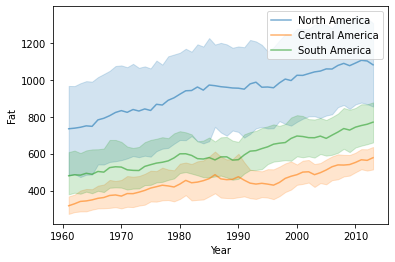

In [ ]:
sns.lineplot(data = north_america_macronutrient["Fat"], label="North America", alpha=0.6)
sns.lineplot(data = central_america_macronutrient["Fat"], label= "Central America", alpha=0.6)
sns.lineplot(data = south_america_macronutrient["Fat"], label="South America", alpha=0.6)


O nível de consumo médio do macronutriente gordura é o dado com maior variância entre todos coletados. Ao enxergar o gráfico referente aos três continentes, é possível notar que, embora a média de consumo de gordura seja maior para a América do Norte, existem faixas de tempo em que países da América do Sul consumiram mais gordura que países da América do Norte. De tal forma, deve existir um "outlier" na América do Norte.

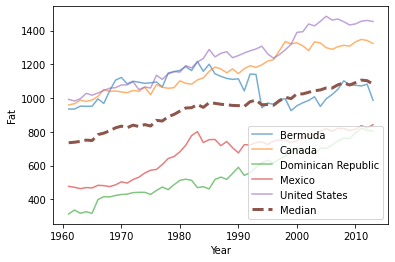

In [ ]:
for country in north_america_countries:
  sns.lineplot(data=north_america_macronutrient.loc[north_america_macronutrient["Country"] == country]["Fat"],label=country,alpha=0.6)
graph = sns.lineplot(data=north_america_macronutrient_by_year["Fat"],label="Median",alpha=1,linewidth=3,linestyle="dashed")
#graph.set(title='Consumo anual médio de gordura na América do Norte, por país')

Como podemos ver, a República Dominicana e o México sempre estão abaixo da média, enquanto os EUA, o Canadá e as Bermudas se mantém majoritariamente com um consumo de gordura maior que a média. Isso pode indicar diferenças entre os grupos de países.



Do gráfico acima, é possível extrair a informação de que os EUA é o país americano que mais consome gordura. Agora, qual é o país americano que menos consome gordura?

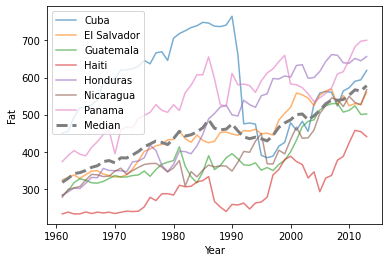

In [ ]:
for country in central_america_countries:
  sns.lineplot(data=central_america_macronutrient.loc[central_america_macronutrient["Country"] == country]["Fat"],label=country,alpha=0.6)
graph = sns.lineplot(data=central_america_macronutrient_by_year["Fat"],label="Median",alpha=1,linewidth=3,linestyle="dashed")
#graph.set(title='Consumo anual médio de gordura na América Central, por país')

O gráfico para a América Central mostra que o Haiti foi o país que menos consumiu gordura nas Américas, em comparação aos EUA:

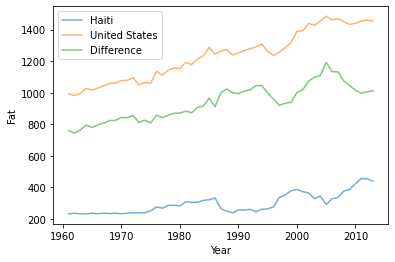

In [ ]:
haiti_fat = central_america_macronutrient.loc[central_america_macronutrient["Country"] == "Haiti"]["Fat"]
usa_fat   = north_america_macronutrient.loc[north_america_macronutrient["Country"] == "United States"]["Fat"]

sns.lineplot(data=haiti_fat,label="Haiti",alpha=0.6)
sns.lineplot(data=usa_fat,label="United States",alpha=0.6)

diff = usa_fat - haiti_fat
graph = sns.lineplot(data=diff,label="Difference",alpha=0.6)

#### Possíveis causas para os resultados encontrados
O estudo de macronutrientes pode ser feito em um nível de abstração mais alto, considerando quais itens são mais presentes na dieta de certos povos e derivando a partição de certo macronutriente na sua produção. Dessa forma, o [ artigo](https://www.academia.edu/18139385/Food_consumption_patterns_and_economic_growth_Increasing_affluence_and_the_use_of_natural_resources?auto=citations&from=cover_page) citado apresenta que:

> "Pessoas em países de baixa renda obtêm energia nutricional principalmente de carboidratos; a contribuição de gorduras é pequena. Pessoas em países de alta renda derivam sua energia nutricional principalmente de carboidratos e gorduras, com contribuição substancial de carne e laticínios"

Dessa forma, há indícios de uma correlação entre o desenvolvimento de um país e o consumo de gordura.

### Análise em variáveis categóricas: Ásia
A seguir, tem-se a filtragem e a organização dos dados nutricionais de países asiáticos. (**Nenhuma análise foi feita até o momento**).

#### Filtragem

In [ ]:
asian_countries = [
    "Afghanistan",
    "Armenia",
    "Azerbaijan",
    # "Bahrain",
    "Bangladesh",
    # "Bhutan",
    "Brunei",
    "Cambodia",
    "China",
    "Cyprus",
    "Georgia",
    "India",
    "Indonesia",
    "Iran",
    "Iraq",
    "Israel",
    "Japan",
    "Jordan",
    "Kazakhstan",
    # "Kuwait",
    # "Kyrgyzstan",
    "Laos",
    "Lebanon",
    "Malaysia",
    "Maldives",
    "Mongolia",
    "Myanmar",
    "Nepal",
    "North Korea",
    "Oman",
    "Pakistan",
    # "Palestine",
    "Philippines",
    # "Qatar",
    "Romania",
    "Russia",
    "Saudi Arabia",
    # "Singapore",
    "South Korea",
    "Sri Lanka",
    # "Syria",
    "Taiwan",
    "Tajikistan",
    "Thailand",
    # "Timor-Leste",
    "Turkey",
    "Turkmenistan",
    "United Arab Emirates",
    "Uzbekistan",
    "Vietnam",
    "Yemen"
]

asia_express = '|'.join(asian_countries)

asia_macronutrient  = diet_macronutrient.loc[diet_macronutrient['Country'].str.contains(asia_express,  case=False, regex=True)]
asia_foodgroup      = diet_foodgroup.loc[diet_foodgroup['Country'].str.contains(asia_express,  case=False, regex=True)]

asia_foodgroup_by_year = asia_foodgroup.groupby("Year").mean()
asia_foodgroup.set_index(keys = 'Year', inplace = True)

asia_macronutrient_by_year = asia_macronutrient.groupby("Year").mean()
asia_macronutrient.set_index(keys = 'Year', inplace = True)

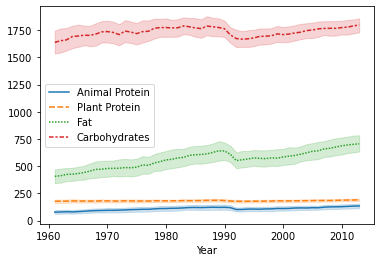

In [ ]:
sns.lineplot(data = asia_macronutrient)

### Análise em variáveis categóricas: Países Soviéticos
Um detalhe particularmente interessante sobre as bases de dados escolhidas é que elas contêm informações acerca de federações depreciadas, isto é, que não existem mais. Em especial - e sob o contexo de análise das informações alimentares em variáveis categóricas -, há dados acerca dos hábitos de alimentação prevalecentes na **União das Repúblicas Socialistas Soviéticas (URSS)** durante seu período de existência. Uma pergunta que surge nesse contexo é exatamente **o quanto a dieta média da URSS reflete a dieta média dos países que a compõem**. A partir das bases de dados coletadas e de algumas técnicas de análise, a seguir, serão extraídos resultados e discutidos indícios que norteiam possíveis respostas a esse questionamento.

#### Filtragem e organização dos dados
A dieta da URSS é retratada em ambas as bases de dados selecionadas, porém sob diferentes pontos de vista. Aqui, será escolhida a abordagem sob **grupos de alimentos**, ao invés de macronutrientes, tendo em vista sua maior granularidade, a qual permite a traçagem de um mapa alimentar mais detalhado que minimize dessemelhanças ocultas sob o agrupamento em macronutrientes.

A pergunta mencionada anteriormente pode ser abstraída por uma **hipótese**, seja ela: **a dieta média da URSS reflete a dieta média dos países que a compõem**. Tal hipótese pode ser **verdadeira** ou **falsa**, resultado para cujo valor indícios serão extraídos dos dados existentes.

Em termos técnicos, a ideia de uma "dieta refletir a outra" foi modelada por meio de **distribuições de probabilidades**. Particularmente, as calorias consumidas na dieta média soviética estão distribuídas sobre os diversos grupos de alimentos na base de dados em voga. Essa distribuição configurará o **modelo** que, sob a **hipótese nula** de que a alimentação da URSS, de fato, reflete a alimentação de seus países-membros, deve ser o mesmo sobre o qual as calorias destes são distribuídas. O objetivo dessa análise, pois, é verificar a factibilidade desse resultado, isto é, de as amostras de calorias consumidas pelos países integrantes - registradas na base de dados - seguirem a mesma distribuição do consumo calórico da URSS.

A URSS foi composta - no total - por 15 países distintos, sejam eles: Armênia, Azerbaijão, Bielorrúsia, Estônia, Geórgia, Cazaquistão, Quirguistão, Letônia, Lituânia, Moldávia, Rússia, Tajiquistão, Turquemenistão, Ucrânia e Uzbequistão. Na base de dados utilizada, há registros para a URSS no período de 1961 (início da coleta de dados) a 1991 (queda dessa unidade federativa), enquanto que os registros para os países-membros começa a partir de 1992, de modo que o processo de coleta, aparentemente, tenha sido coerente em termos históricos. Tendo em vista a minimização de discrepâncias advindas da passagem do tempo, o perfil alimentar da URSS será traçado a partir dos dados referentes a 1991, enquanto que, para os demais países, esse processo será realizado com relação ao ano de 1992.

A partir da base de dados "diet_foodgroup", pois, os consumos de calorias - definidos por pessoa e por dia e dividos por grupo de alimento - para a URSS em 1991 e para seus 15 países-membros em 1992 foram extraídos e organizados em bases de dados dedicadas. Essas informações, ainda, foram **normalizadas** com relação ao total de calorias, de modo que, agora, representem a participação percentual de cada grupo de alimento na dieta média do respectivo país ou, em outras palavras, a **distribuição** de suas calorias em cada categoria alimentícia. Porém, pontua-se que o total de calorias consumido para cada um dos países integrantes foi armazenado e será utilizado para fins de amostragem, o que é detalhado mais adiante.

In [ ]:
# Organizing the group of countries which made part of USSR
ussr_countries = ["Armenia", "Azerbaijan", "Belarus", "Estonia", "Georgia", "Kazakhstan", "Kyrgyzstan", "Latvia", "Lithuania", "Moldova", "Russia", "Tajikistan", "Turkmenistan", "Ukraine", "Uzbekistan"]

In [ ]:
# Filtering and organizing the data bases
# All the data was normalized as percentual participation of the food group in order to equalize the samples
# But the simulation will use each country's sample size accordingly
ussr_diet_foodgroup = diet_foodgroup[diet_foodgroup['Year'] == 1991].drop(columns = 'Year')
ussr_diet_foodgroup.set_index(keys = 'Country', inplace = True)
ussr_diet_foodgroup = ussr_diet_foodgroup.loc['USSR']
ussr_diet_foodgroup = ussr_diet_foodgroup / ussr_diet_foodgroup.sum()

diet_foodgroup_1992 = diet_foodgroup[diet_foodgroup['Year'] == 1992].drop(columns = 'Year')
diet_foodgroup_1992.set_index(keys = 'Country', inplace = True)

soviet_diet_foodgroup = []
soviet_sample_size = []
for country in ussr_countries:
  diet_country = diet_foodgroup_1992.loc[country]
  soviet_sample_size.append(diet_country.sum())
  diet_country = diet_country / diet_country.sum()
  soviet_diet_foodgroup.append(diet_country)

A distribuição de calorias para a URSS no ano de 1991 é plotada sob a forma de um histograma, a título de exemplo, a seguir:

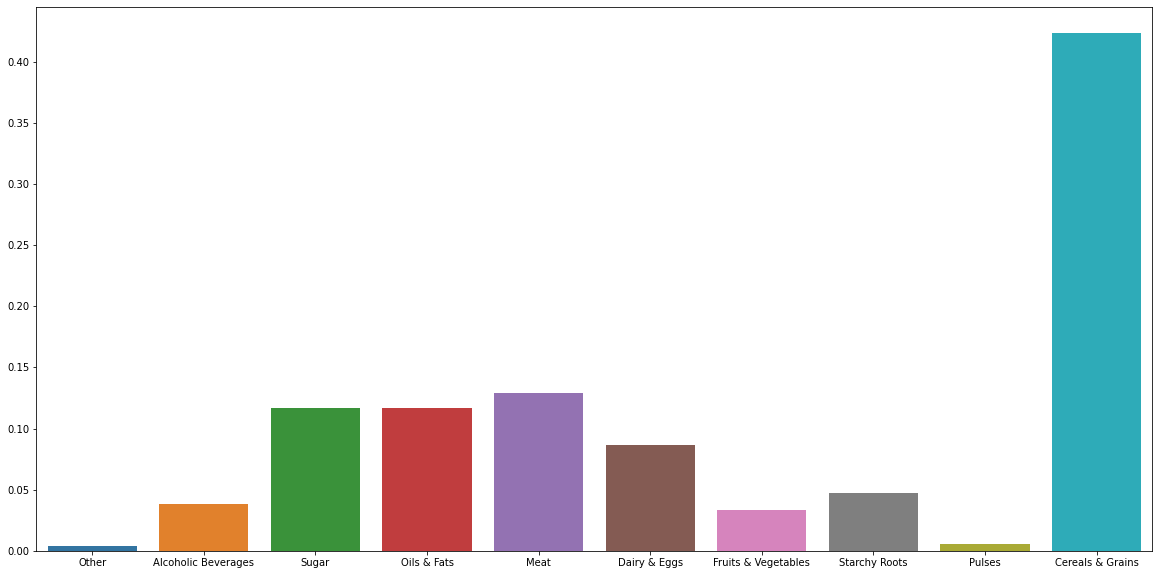

In [ ]:
# Creating a plot for visualization
fig_ussr, axs_ussr = plt.subplots()
fig_ussr.set_size_inches(20, 10)

sns.barplot(x = ussr_diet_foodgroup.index, y = ussr_diet_foodgroup.values, ax = axs_ussr)

#### Simulação sob a hipótese nula
A **hipótese nula** define que as distribuições dos hábitos alimentares dos 15 países-membros ocorre sob a distribuição de probabilidades da dieta média da URSS. Isto implica que quaisquer diferenças seriam fruto apenas do acaso, ou seja, de variações factíveis no processo de amostragem. Aqui, supõe-se que cada caloria é uma **variável aleatória** que segue a distribuição dada pelos dados referentes à URSS com relação ao grupo alimentar ao qual pertence. Assim, os dados para cada país-membro seriam uma **amostra** - de tamanho equivalente à quantidade de calorias média consumida nessa federação - dessa população de calorias.

A **hipótese alternativa**, por sua vez, define que os dados para cada país-membro não seguem a distribuição dos dados referentes à URSS, isto é, a alimentação desta não reflete a daqueles e possivelmente há outros fatores críticos que influenciam as distribuições além da chance.

A **estatística de teste** foi definida como a *total variation distance (TVD)* entre as distribuições da amostra e do modelo. Essa métrica é calculada com base na soma das diferenças absolutas para cada grupo de alimento entre duas distribuições (dividido por 2, para efeito de normalização). Tal escolha é justificada justamente por os dados estarem distribuidos sob categorias, a cada qual uma probabilidade é associada.

Assumindo que a hipótese nula seja verdadeira, para cada país-membro, foi realizada uma simulação da amostragem de sua respectiva quantidade de calorias a partir da distribuição referente à URSS. Para tal, foi utilizado o modelo de **distribuição de probabilidades multinomial**, dado que, novamente, cada grupo de alimento pode ser considerado uma categoria associada a uma probabilidade específica. O cálculo da estatística foi realizado para cada amostra simulada, de modo que, ao final, tenha sido obtido uma distribuição dos valores assumidos por aquela. Particularmente, para cada um dos 15 países soviéticos, 5000 simulações foram realizadas sob o modelo nulo, de modo que 5000 valores da estatística de teste foram gerados, permitindo uma aproximação razoável da distribuição dessa métrica.

In [ ]:
# Simulating the USSR distribution for each country
def ussr_single_simulation(data, sample_size):
  return multinomial.rvs(sample_size, data)/sample_size

def total_variation_distance(model, data):
  return (model - data).abs().sum() / 2

size = 5000
simulated_statistic = np.zeros(shape = (len(ussr_countries), size))
for i in range(len(ussr_countries)):
  for j in range(size):
    simulation = ussr_single_simulation(ussr_diet_foodgroup, soviet_sample_size[i])
    simulated_statistic[i][j] = total_variation_distance(ussr_diet_foodgroup, simulation)

#### Avaliação das hipóteses
A **estatística de teste** foi calculada para os dados reais de cada um dos 15 países-membros. Com os valores reais e com a distribuição sob o modelo nulo em mãos, pois, é uma questão de plotar e visualizar os dados para avaliar a factibilidade de as amostras de cada país soviético terem sido originadas de uma mesma distribuição de probabilidades, sendo esta referente à URSS. A seguir, para cada um dos 15 ditos integrantes, tem-se o histograma para os valores da estatística simulados sob a hipótese nula e uma marcação - linha vermelha no eixo das abscissas - para o valor da estatística de teste real.

In [ ]:
# Calculating the test statistic for every soviet country
test_statistic_values = []
for i in range(len(ussr_countries)):
  test_statistic = total_variation_distance(ussr_diet_foodgroup, soviet_diet_foodgroup[i])
  test_statistic_values.append(test_statistic)

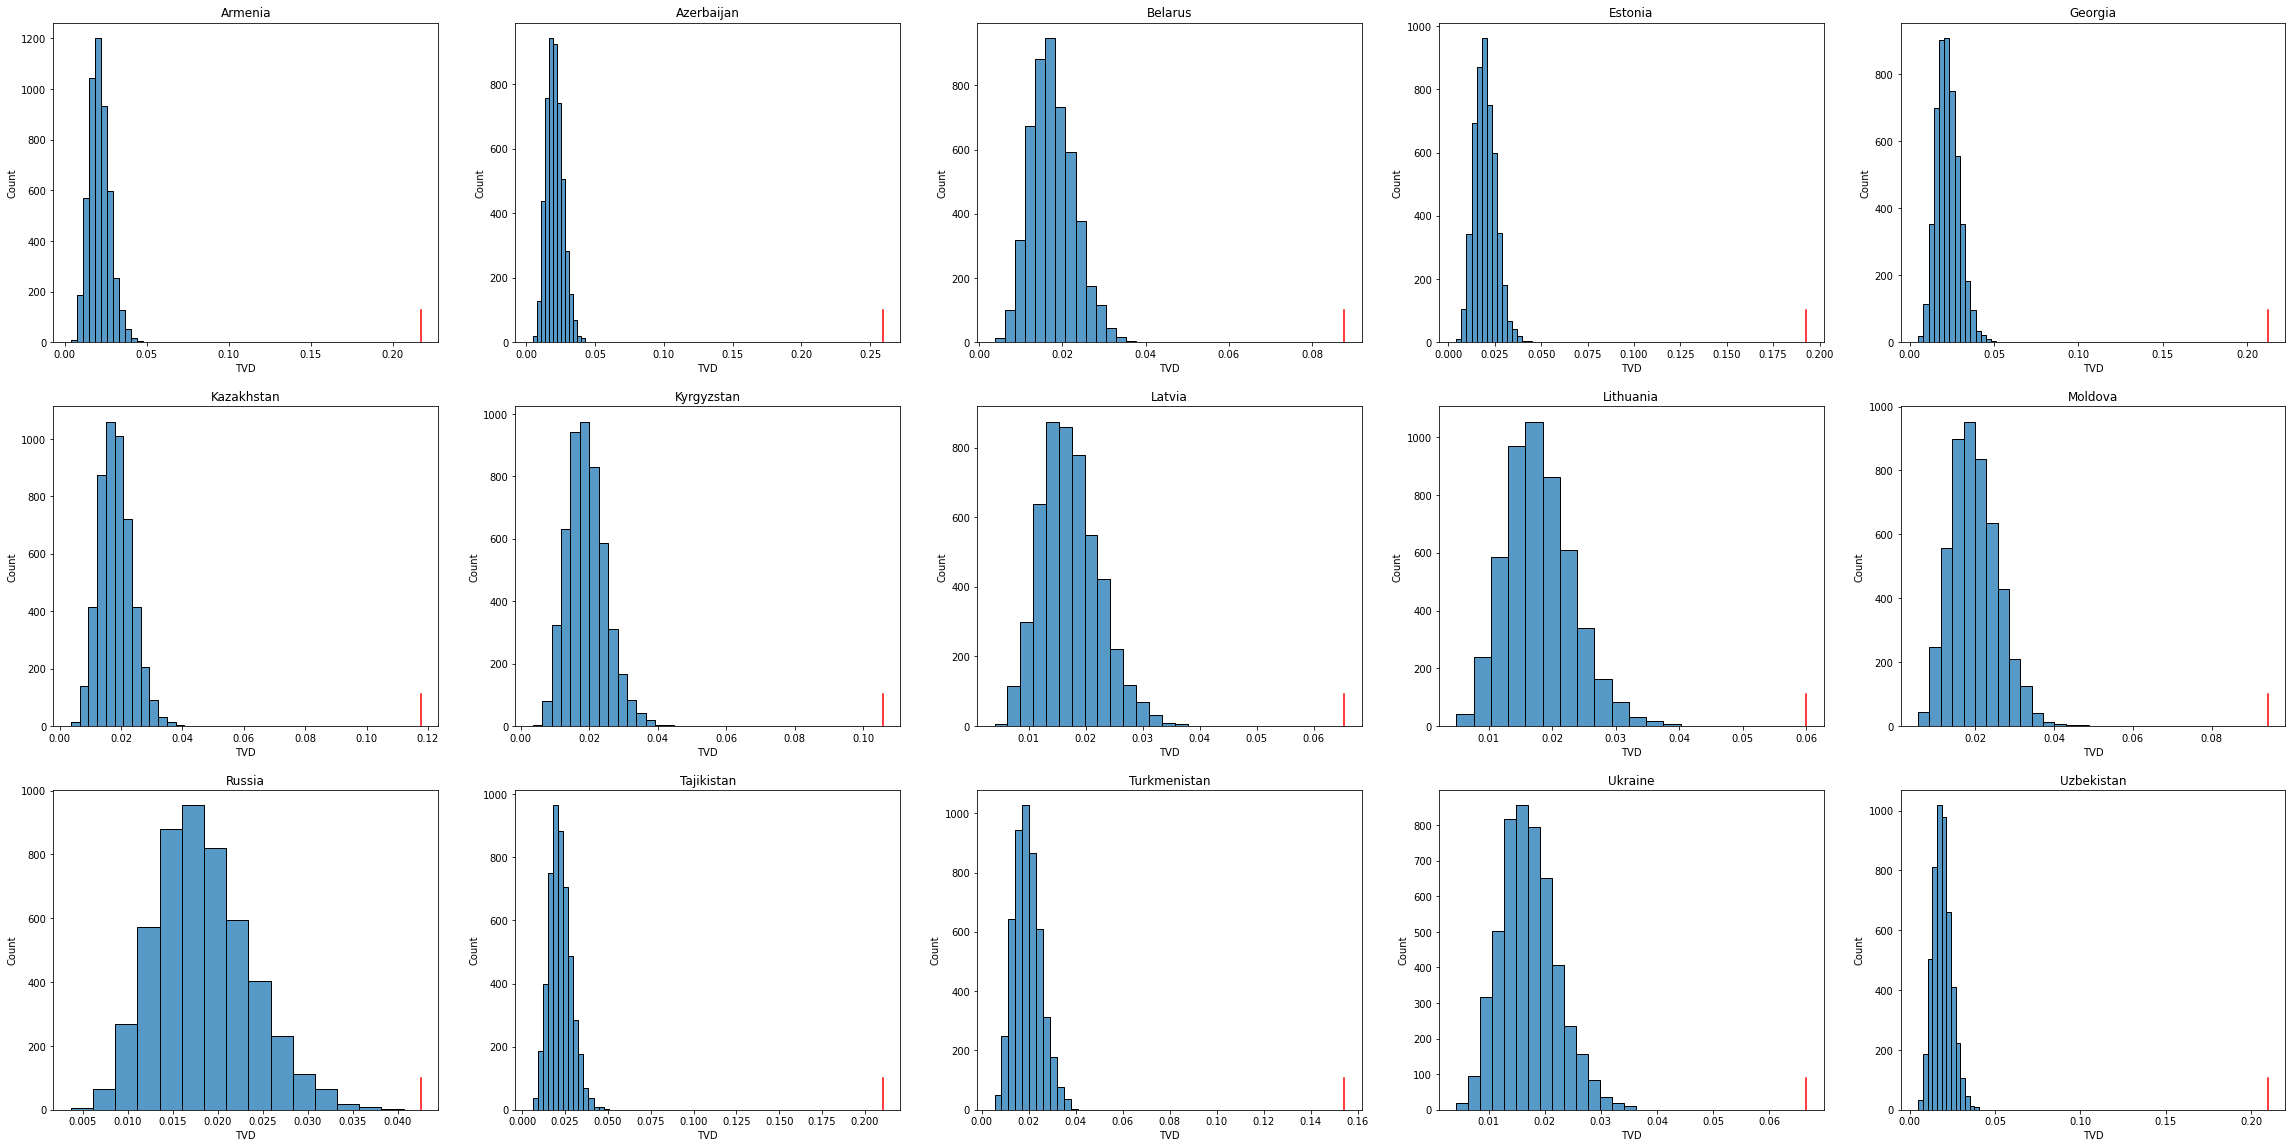

In [ ]:
# Plotting the results
fig_ussr_simulation, axs_ussr_simulation = plt.subplots(3, 5)
fig_ussr_simulation.set_size_inches(40, 20)

for i in range(3):
  for j in range(5):
    sns.histplot(data = simulated_statistic[i*5 + j], ax = axs_ussr_simulation[i][j], bins = 15)
    axs_ussr_simulation[i][j].axvline(x = test_statistic_values[i*5 + j], ymax = 0.1, color = 'r')
    axs_ussr_simulation[i][j].set(title = ussr_countries[i*5 + j], xlabel = 'TVD')

#### Resultados e observações
A partir dos gráficos, é nítido que nenhum valor da estatística de teste referente aos dados reais se aproxima dos valores obtidos a partir das simulações feitas sob o modelo nulo. Um passo mais fundo, o **p-valor** de cada um dos 15 países-membros é exatamente 0, ou seja, em nenhum caso houve simulações dentre as 5000 realizadas com resultados tão extremos quanto os dados reais. Essas informações, portanto, são um grande indício de invalidade da hipótese nula e de validade da hipótese alternativa, isto é, são uma evidência forte de que os hábitos alimentares entre os países soviéticos no marco de fim da URSS - a transição entre os anos 1991 e 1992 - não eram bem refletidos pelos dados referentes à união. Vale ressaltar que os resultados não explicam de forma alguma a causa para a discrepância, podendo ela ter sido a forma com que os dados foram extraídos, uma mudança abrupta na alimentação dos países entre os anos avaliados, dentre outras. Porém, os resultados obtidos abrem margem para toda uma nova gama de perguntas. A título de exemplo, é perceptível que a estatística de teste que mais se aproxima das simulações é referente à Rússia, o que é conforme com o fato de este país ter sido o principal centro político, econômico e cultural da URSS. Nessa linha de raciocínio, é possível questionar se a proximidade da estatística de teste aos valores extremos da simulação não estaria correlacionada ao grau de atuação do respectivo país-membro na união como um todo. Por mais que essa análise termine aqui, seus resultados, novamente, reiteram a riqueza das informações agregadas em dados referentes a questões nutricionais.

## Gordura como discrepante econômico

In [ ]:
diet_macronutrient["Fat Z-Score General"] = (diet_macronutrient["Fat"] - diet_macronutrient["Fat"].mean())/diet_macronutrient["Fat"].std()

In [ ]:
db_countries_classification = pd.read_excel("http://databank.worldbank.org/data/download/site-content/CLASS.xlsx")
db_countries_classification = db_countries_classification[:218].rename(columns = {"Economy": "Country"})
db_countries_classification["Income group"] = db_countries_classification["Income group"].apply(lambda x: "Middle income" if ("middle" in str(x)) else x)

In [ ]:
db_countries_classification

,Country,Code,Region,Income group,Lending category,Other (EMU or HIPC)
0,Aruba,ABW,Latin America & Caribbean,High income,NaN,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA,HIPC
2,Angola,AGO,Sub-Saharan Africa,Middle income,IBRD,NaN
3,Albania,ALB,Europe & Central Asia,Middle income,IBRD,NaN
4,Andorra,AND,Europe & Central Asia,High income,NaN,NaN
...,...,...,...,...,...,...
213,Kosovo,XKX,Europe & Central Asia,Middle income,IDA,NaN
214,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,IDA,NaN
215,South Africa,ZAF,Sub-Saharan Africa,Middle income,IBRD,NaN
216,Zambia,ZMB,Sub-Saharan Africa,Low income,IDA,HIPC


In [ ]:
diet_macronutrient_classificated= pd.merge(diet_macronutrient, db_countries_classification, on='Country', how='left')

In [ ]:
low_income = diet_macronutrient_classificated[diet_macronutrient_classificated["Income group"] == "Low income"].copy()
low_income_by_year = low_income.groupby("Year").mean()
low_income.set_index(keys = 'Year', inplace = True)

high_income = diet_macronutrient_classificated[diet_macronutrient_classificated["Income group"] == "High income"].copy()
high_income_by_year = high_income.groupby("Year").mean()
high_income.set_index(keys = 'Year', inplace = True)

medium_income = diet_macronutrient_classificated[diet_macronutrient_classificated["Income group"] == "Middle income"].copy()
medium_income_by_year = medium_income.groupby("Year").mean()
medium_income.set_index(keys = 'Year', inplace = True)


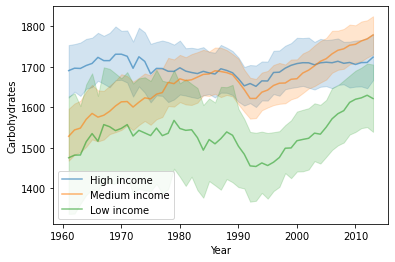

In [ ]:
sns.lineplot(data = high_income["Carbohydrates"], label="High income", alpha=0.6)
sns.lineplot(data = medium_income["Carbohydrates"], label="Medium income", alpha=0.6)
sns.lineplot(data = low_income["Carbohydrates"], label="Low income", alpha=0.6)

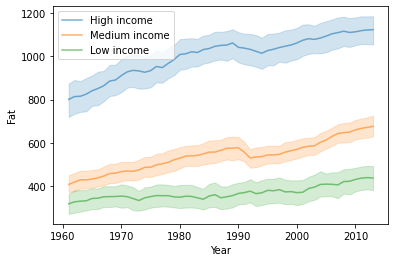

In [ ]:
sns.lineplot(data = high_income["Fat"], label="High income", alpha=0.6)
sns.lineplot(data = medium_income["Fat"], label="Medium income", alpha=0.6)
sns.lineplot(data = low_income["Fat"], label="Low income", alpha=0.6)

In [ ]:
low_and_medium_income = pd.concat([medium_income,low_income]).copy()

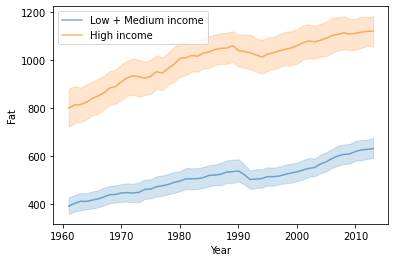

In [ ]:
sns.lineplot(data = low_and_medium_income["Fat"], label="Low + Medium income", alpha=0.6)
sns.lineplot(data = high_income["Fat"], label="High income", alpha=0.6)

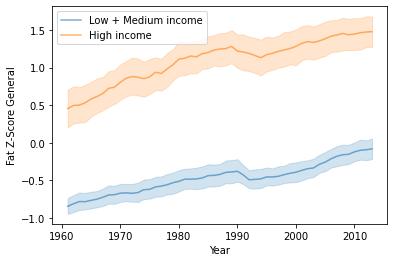

In [ ]:
sns.lineplot(data = low_and_medium_income["Fat Z-Score General"], label="Low + Medium income", alpha=0.6)
sns.lineplot(data = high_income["Fat Z-Score General"], label="High income", alpha=0.6)

In [ ]:
low_and_medium_income["Fat Z-Score"] = (low_and_medium_income["Fat"] - low_and_medium_income["Fat"].mean())/low_and_medium_income["Fat"].std()
high_income["Fat Z-Score"] = (high_income["Fat"] - high_income["Fat"].mean())/high_income["Fat"].std()

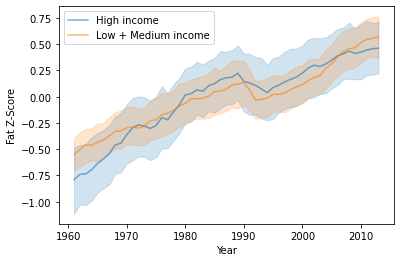

In [ ]:
sns.lineplot(data = high_income["Fat Z-Score"], label="High income", alpha=0.6)
sns.lineplot(data = low_and_medium_income["Fat Z-Score"], label="Low + Medium income", alpha=0.6)

In [ ]:
maximum_fat_low_income_1961 = low_income.reset_index().groupby("Year")["Fat"].describe().loc[1961,"max"]

In [ ]:
high_income = high_income.reset_index()
target = list(high_income[(high_income["Year"] == 1961) & (high_income["Fat"] <= maximum_fat_low_income_1961)]["Country"])
high_income.set_index(keys = 'Year', inplace = True)

[Text(0.5, 1.0, 'Consumo anual médio de gordura na América do Norte, por país')]

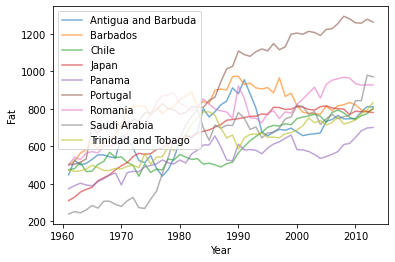

In [ ]:
for country in target:
  sns.lineplot(data=high_income.loc[high_income["Country"] == country]["Fat"],label=country,alpha=0.6)
graph.set(title='Consumo anual médio de gordura na América do Norte, por país')

## Regressão logistica

In [ ]:
regression_seventies_classificated = diet_macronutrient_classificated[["Country","Income group"]].drop_duplicates().copy()
regression_seventies_classificated["Beta Fat"]    = np.zeros(len(regression_seventies_classificated))
regression_seventies_classificated["Alpha Fat"]   = np.zeros(len(regression_seventies_classificated))
regression_seventies_classificated["Mean Fat"]    = np.zeros(len(regression_seventies_classificated))

regression_seventies_classificated["Beta Carbohydrates"]    = np.zeros(len(regression_seventies_classificated))
regression_seventies_classificated["Alpha Carbohydrates"]   = np.zeros(len(regression_seventies_classificated))
regression_seventies_classificated["Mean Carbohydrates"]    = np.zeros(len(regression_seventies_classificated))

regression_seventies_classificated["Beta Protein"]    = np.zeros(len(regression_seventies_classificated))
regression_seventies_classificated["Alpha Protein"]   = np.zeros(len(regression_seventies_classificated))
regression_seventies_classificated["Mean Protein"]    = np.zeros(len(regression_seventies_classificated))




In [ ]:
regression_seventies_classificated

,Country,Income group,Beta Fat,Alpha Fat,Mean Fat,Beta Carbohydrates,Alpha Carbohydrates,Mean Carbohydrates,Beta Protein,Alpha Protein,Mean Protein
0,Afghanistan,Low income,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,Albania,Middle income,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,Algeria,Middle income,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,Angola,Middle income,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,Antigua and Barbuda,High income,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8738,Vietnam,Middle income,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8791,Yemen,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8844,Yugoslavia,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8875,Zambia,Low income,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def regression(country,col = "Fat",min=1960,max=1980):
  df  = diet_macronutrient_classificated[diet_macronutrient_classificated["Country"] == country]
  df  = df[(df.Year >= min) & (df.Year <= max)]
  x   = df["Year"]
  y   = df[col]
  if(len(y) == 0):
    return(0,0)
  beta =  np.cov(x,y)[0,1]/x.var()
  alpha = y.mean() - beta*x.mean()
  return (alpha,beta)

def mean(country,col = "Fat"):
  df  = diet_macronutrient_classificated[diet_macronutrient_classificated["Country"] == country]
  return df[col].mean()

In [ ]:
i,j = 1970,1980
df = regression_seventies_classificated["Country"].apply(lambda x: regression(x,min=i,max=j))
regression_seventies_classificated["Alpha Fat"]   = df.apply(lambda x: x[0])
regression_seventies_classificated["Beta Fat"]    = df.apply(lambda x: x[1])
regression_seventies_classificated["Mean Fat"]    = regression_seventies_classificated["Country"].apply(lambda x: mean(x))


df = regression_seventies_classificated["Country"].apply(lambda x: regression(x,"Carbohydrates",i,j))
regression_seventies_classificated["Alpha Carbohydrates"]   = df.apply(lambda x: x[0])
regression_seventies_classificated["Beta Carbohydrates"]    = df.apply(lambda x: x[1])
regression_seventies_classificated["Mean Carbohydrates"]    = regression_seventies_classificated["Country"].apply(lambda x: mean(x,"Carbohydrates"))


df = regression_seventies_classificated["Country"].apply(lambda x: regression(x,"Animal Protein",i,j))
regression_seventies_classificated["Alpha Protein"]   = df.apply(lambda x: x[0])
regression_seventies_classificated["Beta Protein"]    = df.apply(lambda x: x[1])
regression_seventies_classificated["Mean Protein"]    = regression_seventies_classificated["Country"].apply(lambda x: mean(x,"Animal Protein"))


In [ ]:
beta_high   = regression_seventies_classificated.groupby("Income group").mean().loc["High income","Beta Fat"]
alpha_high  = regression_seventies_classificated.groupby("Income group").mean().loc["High income","Alpha Fat"]

beta_medium   = regression_seventies_classificated.groupby("Income group").mean().loc["Middle income","Beta Fat"]
alpha_medium  = regression_seventies_classificated.groupby("Income group").mean().loc["Middle income","Alpha Fat"]

beta_low   = regression_seventies_classificated.groupby("Income group").mean().loc["Low income","Beta Fat"]
alpha_low  = regression_seventies_classificated.groupby("Income group").mean().loc["Low income","Alpha Fat"]

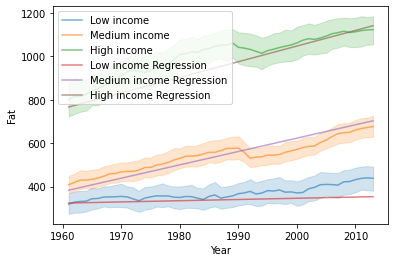

In [ ]:
sns.lineplot(data = low_income["Fat"], label="Low income", alpha=0.6)
sns.lineplot(data = medium_income["Fat"], label="Medium income", alpha=0.6)
sns.lineplot(data = high_income["Fat"], label="High income", alpha=0.6)

sns.lineplot(x = np.arange(1961,2014), y = np.arange(1961,2014)*beta_low + alpha_low, label="Low income Regression", alpha=0.6)
sns.lineplot(x = np.arange(1961,2014), y = np.arange(1961,2014)*beta_medium + alpha_medium, label="Medium income Regression", alpha=0.6)
sns.lineplot(x = np.arange(1961,2014), y = np.arange(1961,2014)*beta_high + alpha_high, label="High income Regression", alpha=0.6)

In [ ]:
regression_seventies_classificated["Income group"] = regression_seventies_classificated["Income group"].apply(lambda x: 1 if (str(x) == "High income") else 0)

In [ ]:
regression_seventies_classificated = regression_seventies_classificated.rename(columns = {"Income group":"IS High Income"}).reset_index()

In [ ]:
regression_seventies_classificated

,index,Country,IS High Income,Beta Fat,Alpha Fat,Mean Fat,Beta Carbohydrates,Alpha Carbohydrates,Mean Carbohydrates,Beta Protein,Alpha Protein,Mean Protein
0,0,Afghanistan,0,3.857727,-7273.223182,342.613019,-5.996636,13827.397727,1737.758302,0.236364,-408.985455,58.148679
1,53,Albania,0,12.072273,-23356.288636,606.888679,17.272091,-32355.905909,1711.022264,1.153455,-2198.796364,122.298868
2,106,Algeria,0,21.942818,-42958.632273,494.813208,56.970636,-111044.265909,1716.982264,2.036364,-3978.018182,63.686792
3,159,Angola,0,15.117545,-29520.347727,354.985472,-17.395364,35789.860455,1367.779811,1.700364,-3313.032727,51.615094
4,212,Antigua and Barbuda,1,-10.126636,20549.687727,669.294340,-29.249364,58889.966818,1208.606792,1.905091,-3629.543636,179.884528
...,...,...,...,...,...,...,...,...,...,...,...,...
174,8738,Vietnam,0,-3.122182,6335.402727,294.541132,-8.286545,17930.884545,1610.106415,-0.892000,1792.743636,52.803019
175,8791,Yemen,0,10.915364,-21243.645000,350.806415,11.870818,-22051.995000,1448.193585,3.485818,-6848.632727,42.646792
176,8844,Yugoslavia,0,16.824273,-32357.344091,857.578065,3.920455,-5462.648636,2251.070968,5.370545,-10468.776364,134.801290
177,8875,Zambia,0,-3.757909,7791.868636,321.692264,10.160818,-18392.719545,1525.772642,-1.463273,2943.036364,43.910189


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

cols = [
        # "Beta Fat",
        # "Alpha Fat",
        # "Mean Fat",

        # "Beta Protein",
        # "Alpha Protein",
        # "Mean Protein",

        # "Beta Carbohydrates",
        # "Alpha Carbohydrates",
        "Mean Carbohydrates"
]
x_train, x_test, y_train, y_test = train_test_split(regression_seventies_classificated[cols], regression_seventies_classificated["IS High Income"], test_size=0.33, random_state=102)
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


LogisticRegression()

In [ ]:
predictions = logisticRegr.predict(x_test)

In [ ]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.7666666666666667


In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[46  0]
 [14  0]]


In [ ]:
def bootstrap(data,logisticRegr,cols,n_sub=5000):
  size   = len(data)
  values = np.zeros(n_sub)
  for i in range(n_sub):
    # replace=TRUE garanta amostras com reposição
    random_state=i #garante replicabilidade do experimento
    sample = data.sample(size, replace=True, random_state=i)

    # Lembre que podemos utilizar mediana, média ou qualquer outra estatística agregada
    # values[i] = sample[col].median()
    values[i] = logisticRegr.score(sample[cols], sample["y"])

  # Gerando valores inferior e superior para um nível de confiança de 95%
  LI = np.percentile(values, 2.5)
  LS = np.percentile(values, 97.5)
  return values, LI, LS

data  = x_test.copy()
data["y"] = y_test.copy()
values, LI, LS = bootstrap(data,logisticRegr,list(x_test.columns))
print('{:.3f} - {:.3f}  {:.3f}'.format(LI.round(3), LS.round(3),values.mean().round(3)))

0.650 - 0.867  0.767
